In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm
import cmath
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.optimize import fsolve
import scipy.optimize as opt

# To supress warnings from seaborn
if not sys.warnoptions:
    import warnings
    warnings.simplefilter(action='ignore', category=FutureWarning)

from matplotlib import rc
rc('text', usetex=True)
plt.rcParams['text.latex.preamble'] = r"\usepackage{amsmath}"
plt.rcParams['font.family'] = 'monospace'

In [2]:
def fileparser(path, dlist):
    df = pd.read_csv(path)
    df.drop(columns=dlist, inplace=True)    
    n = len(df)
    weight = int(round(np.mean(np.abs(df['weight'].to_numpy())) * 6 * 1e6 * n))
    df['weight'] = df['weight']
    return df, weight

In [3]:
dlist = ['dphibb', 'etaaa', 'ptb2', 'drbamin', 'met', 'etaa2', 'etab1', 'etaa1', 'nbjet', 'etab2']

# 14 TeV
df_yb2, weight_yb2 = fileparser("../simulations/HL-LHC/yb2.csv", dlist)
df_ybyt, weight_ybyt = fileparser("../simulations/HL-LHC/ybyt.csv", dlist)
df_yt2, weight_yt2 = fileparser("../simulations/HL-LHC/yt2.csv", dlist)
df_zh, weight_zh = fileparser("../simulations/HL-LHC/zh.csv", dlist)
df_bbxaa, weight_bbxaa = fileparser("../simulations/HL-LHC/bbxaa.csv", dlist)

print("No. of yb2 events: train = {}".format(df_yb2.shape[0]))
print("No. of ybyt events: train = {}".format(df_ybyt.shape[0]))
print("No. of yt2 events: train = {}".format(df_yt2.shape[0]))
print("No. of zh events: train = {}".format(df_zh.shape[0]))
print("No. of bbxaa events: train = {}".format(df_bbxaa.shape[0]))

No. of yb2 events: train = 46740
No. of ybyt events: train = 38341
No. of yt2 events: train = 101774
No. of zh events: train = 179021
No. of bbxaa events: train = 137488


In [4]:
def kappag_re(kbre):
    return complex(-0.05, 0.08)*kbre + complex(1.05, -0.08)

def kappag_im(kbim):
    return complex(-0.06, 0.08)*kbim

def kappagam_re(kbre):
    return complex(0.004, -0.005)*kbre + complex(0.996, 0.005)

def kappagam_im(kbim):
    return complex(0.004, -0.005)*kbim

def sigmabbh100(kbre, kbim):
    intr = -0.062237886957151184*kbim**2 + 1.0536810705678374*kbre - 0.053681070567837455*kbre**2
    return 32074.*(kbre**2 + kbim**2) - 964.*intr + 48772. + 1860. + 172088.

def sigmabbh200(kbre, kbim):
    intr = -0.062237886957151184*kbim**2 + 1.0536810705678374*kbre - 0.053681070567837455*kbre**2
    return 15112.*(kbre**2 + kbim**2) - 6815.*intr + 45751. + 4498. + 373436.

def sigmabbh1(kbre, kbim):
    intr = -0.062237886957151184*kbim**2 + 1.0536810705678374*kbre - 0.053681070567837455*kbre**2
    return (170.*(kbre**2 + kbim**2) - 7.*intr + 238. + 22. + 2183.)

def sigmabbh2(kbre, kbim):
    intr = -0.062237886957151184*kbim**2 + 1.0536810705678374*kbre - 0.053681070567837455*kbre**2
    return (54.*(kbre**2 + kbim**2) - 24.*intr + 112. + 28. + 2450.)

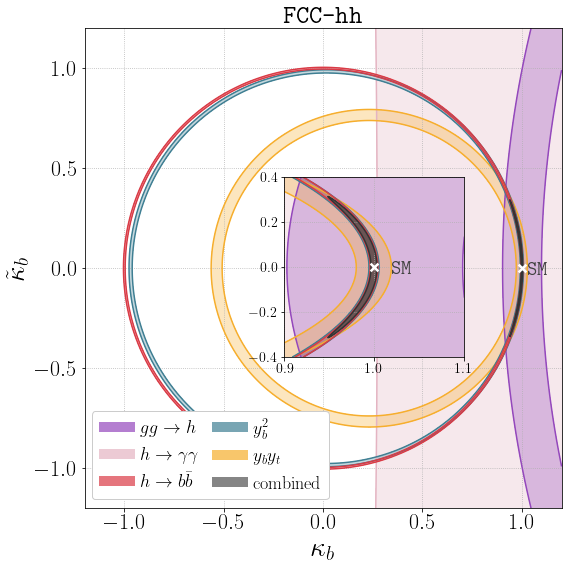

In [5]:
delta = 0.00025
plt.rcParams['contour.negative_linestyle'] = 'solid'
x = np.arange(-1.2, 1.2, delta)
y = np.arange(-1.2, 1.2, delta)
X, Y = np.meshgrid(x, y)
Z = abs(abs(kappag_re(X))**2 + abs(kappag_im(Y))**2 - 1.)
# z_lim = 0.016064/np.sqrt(90.)
z_lim = 0.0098
Z1 = abs(abs(kappagam_re(X))**2 + abs(kappagam_im(Y))**2 - 1.)
# z1_lim = 0.026169/np.sqrt(90.)
z1_lim = 0.0058
Z2 = abs(X**2 + Y**2 -1)
# z2_lim = 0.044484/np.sqrt(50.)
z2_lim = 0.0086
Z3 = sigmabbh100(X, Y) - sigmabbh100(1., 0.)
z3_lim = np.sqrt(sigmabbh100(1., 0.))
Z4 = sigmabbh200(X, Y) - sigmabbh200(1., 0.)
z4_lim = np.sqrt(sigmabbh200(1., 0.))

comb = np.sqrt(Z**2/z_lim**2 + Z1**2/z1_lim**2 + Z2**2/z2_lim**2 + Z3**2/z3_lim**2 + Z4**2/z4_lim**2)

plt.figure(figsize=(8,8))

plt.contourf(X, Y, Z1, levels=[0., z1_lim], colors='#E4B4C2', alpha=0.3)
plt.contour(X, Y, Z1, levels=[0., z1_lim], colors=['#E4B4C2'])

plt.contourf(X, Y, Z, levels=[0., z_lim], colors='#9448BC', alpha=0.3)
plt.contour(X, Y, Z, levels=[0., z_lim], colors=['#9448BC'])

plt.contourf(X, Y, Z4, levels=[-z4_lim, z4_lim], colors='#F6AE2D', alpha=0.3)
plt.contour(X, Y, Z4, levels=[-z4_lim, z4_lim], colors=['#F6AE2D'])

plt.contourf(X, Y, Z3, levels=[-z3_lim, z3_lim], colors='#3f7f93', alpha=0.3)
plt.contour(X, Y, Z3, levels=[-z3_lim, z3_lim], colors=['#3f7f93'])

plt.contourf(X, Y, Z2, levels=[0., z2_lim], colors='#da3b46', alpha=0.3)
plt.contour(X, Y, Z2, levels=[0., z2_lim], colors=['#da3b46'])

plt.contourf(X, Y, comb, levels=[0., 1.], colors='#343434', alpha=0.6)
plt.contour(X, Y, comb, levels=[0., 1.], colors=['#343434'])

plt.scatter([1], [0], color='#ffffff', zorder=100, marker='x', s=60, linewidth=2.5)
plt.annotate('SM', xy=(1.03, -0.01), xycoords='data', horizontalalignment='left',
                verticalalignment='center', fontsize=20, fontweight='900', zorder=100, color='#434343')

plt.grid(linestyle=':')
plt.xlabel(r'$\kappa_b$', fontsize=28)
plt.ylabel(r'$\tilde\kappa_b$', fontsize=28)

labels = [r'$gg\to h$', r'$h\to \gamma\gamma$', r'$h\to b\bar b$', r'$y_b^2$', r'$y_by_t$', r'$\rm combined$']
line0 = Line2D([0], [0], color='#9448BC', linewidth=10, linestyle='-', solid_capstyle='butt', alpha=0.7)
line1 = Line2D([0], [0], color='#E4B4C2', linewidth=10, linestyle='-', solid_capstyle='butt', alpha=0.7)
line2 = Line2D([0], [0], color='#da3b46', linewidth=10, linestyle='-', solid_capstyle='butt', alpha=0.7)
line3 = Line2D([0], [0], color='#3f7f93', linewidth=10, linestyle='-', solid_capstyle='butt', alpha=0.7)
line4 = Line2D([0], [0], color='#F6AE2D', linewidth=10, linestyle='-', solid_capstyle='butt', alpha=0.7)
line5 = Line2D([0], [0], color='#343434', linewidth=10, linestyle='-', solid_capstyle='butt', alpha=0.6)
leg = plt.figlegend(handles=[line0, line1, line2, line3, line4, line5], labels=labels, bbox_to_anchor=[0.150, 0.110],
                    loc='lower left', prop={'size': 18}, fancybox=True, framealpha=1, columnspacing=0.8, ncol=2, handletextpad=0.3)

plt.locator_params(axis='y', nbins=9)
plt.locator_params(axis='x', nbins=9)
plt.tick_params(axis="x", labelsize=22)
plt.tick_params(axis="y", labelsize=22)
plt.title('FCC-hh', fontsize=26)

ax = plt.gca()
### Inset
axins = inset_axes(ax, width=2.5, height=2.5, loc='center',bbox_to_anchor=(.12, .24, .975, .525),
                   bbox_transform=ax.transAxes)

delta = 0.00025
plt.rcParams['contour.negative_linestyle'] = 'solid'
x = np.arange(0.9, 1.101, delta)
y = np.arange(-0.4, 0.401, delta)
X, Y = np.meshgrid(x, y)
Z = abs(abs(kappag_re(X))**2 + abs(kappag_im(Y))**2 - 1.)
z_lim = 0.0098
Z1 = abs(abs(kappagam_re(X))**2 + abs(kappagam_im(Y))**2 - 1.)
z1_lim = 0.0058
Z2 = abs(X**2 + Y**2 - 1.)
z2_lim = 0.0086
Z3 = sigmabbh100(X, Y) - sigmabbh100(1., 0.)
z3_lim = np.sqrt(sigmabbh100(1., 0.))/np.sqrt(2.)
Z4 = sigmabbh200(X, Y) - sigmabbh200(1., 0.)
z4_lim = np.sqrt(sigmabbh200(1., 0.))/np.sqrt(2.)

comb = np.sqrt(Z**2/z_lim**2 + Z1**2/z1_lim**2 + Z2**2/z2_lim**2 + Z3**2/z3_lim**2 + Z4**2/z4_lim**2)

plt.contourf(X, Y, Z1, levels=[0., z1_lim], colors='#E4B4C2', alpha=0.3)

plt.contourf(X, Y, Z, levels=[0., z_lim], colors='#9448BC', alpha=0.3)
plt.contour(X, Y, Z, levels=[0., z_lim], colors=['#9448BC'])

plt.contourf(X, Y, Z4, levels=[-z4_lim, z4_lim], colors='#F6AE2D', alpha=0.3)
plt.contour(X, Y, Z4, levels=[-z4_lim, z4_lim], colors=['#F6AE2D'])

plt.contourf(X, Y, Z3, levels=[-z3_lim, z3_lim], colors='#3f7f93', alpha=0.3)
plt.contour(X, Y, Z3, levels=[-z3_lim, z3_lim], colors=['#3f7f93'])

plt.contourf(X, Y, Z2, levels=[0., z2_lim], colors='#da3b46', alpha=0.3)
plt.contour(X, Y, Z2, levels=[0., z2_lim], colors=['#da3b46'])

plt.contourf(X, Y, comb, levels=[0., 1.], colors='#343434', alpha=0.6)
plt.contour(X, Y, comb, levels=[0., 1.], colors=['#343434'])

plt.scatter([1], [0], color='#ffffff', zorder=100, marker='x', s=60, linewidth=2.5)
plt.annotate('SM', xy=(1.02, -0.01), xycoords='data', horizontalalignment='left',
                verticalalignment='center', fontsize=20, fontweight='900', zorder=100, color='#434343')

plt.grid(linestyle=':')

plt.tick_params(axis="x", labelsize=14)
plt.tick_params(axis="y", labelsize=14)

plt.tight_layout()
plt.savefig('../plots/bcp100.pdf', dpi=300)
plt.show()

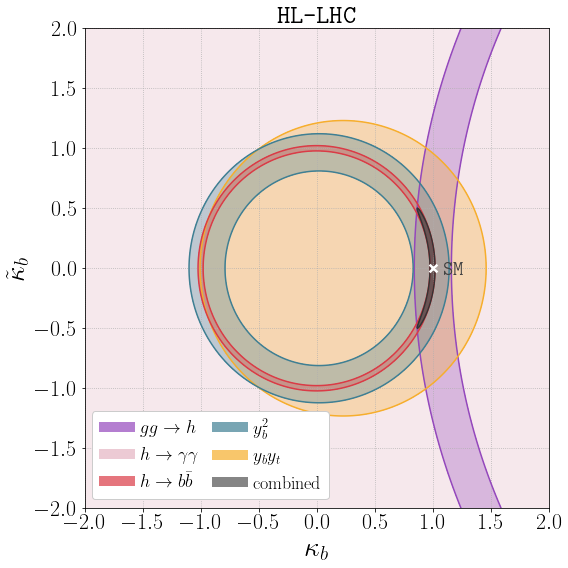

In [6]:
delta = 0.0025
plt.rcParams['contour.negative_linestyle'] = 'solid'
x = np.arange(-2, 2.0025, delta)
y = np.arange(-2, 2.0025, delta)
X, Y = np.meshgrid(x, y)
Z = abs(abs(kappag_re(X))**2 + abs(kappag_im(Y))**2 - 1.)
z_lim = 0.016
Z1 = abs(abs(kappagam_re(X))**2 + abs(kappagam_im(Y))**2 - 1.)
z1_lim = 0.026
Z2 = abs(X**2 + Y**2 - 1.)
z2_lim = 0.044
Z3 = sigmabbh1(X, Y) - sigmabbh1(1., 0.)
z3_lim = np.sqrt(sigmabbh1(1., 0.))
Z4 = sigmabbh2(X, Y) - sigmabbh2(1., 0.)
z4_lim = np.sqrt(sigmabbh2(1., 0.))


comb = np.sqrt(Z**2/z_lim**2 + Z1**2/z1_lim**2 + Z2**2/z2_lim**2 + Z3**2/z3_lim**2 + Z4**2/z4_lim**2)

plt.figure(figsize=(8,8))

plt.contourf(X, Y, Z1, levels=[0., z1_lim], colors='#E4B4C2', alpha=0.3)

plt.contourf(X, Y, Z, levels=[0., z_lim], colors='#9448BC', alpha=0.3)
plt.contour(X, Y, Z, levels=[0., z_lim], colors=['#9448BC'])

plt.contourf(X, Y, Z4, levels=[-z4_lim, z4_lim], colors='#F6AE2D', alpha=0.3)
plt.contour(X, Y, Z4, levels=[-z4_lim, z4_lim], colors=['#F6AE2D'])

plt.contourf(X, Y, Z3, levels=[-z3_lim, z3_lim], colors='#3f7f93', alpha=0.3)
plt.contour(X, Y, Z3, levels=[-z3_lim, z3_lim], colors=['#3f7f93'])

plt.contourf(X, Y, Z2, levels=[0., z2_lim], colors='#da3b46', alpha=0.3)
plt.contour(X, Y, Z2, levels=[0., z2_lim], colors=['#da3b46'])

plt.contourf(X, Y, comb, levels=[0., 1.], colors='#343434', alpha=0.6)
plt.contour(X, Y, comb, levels=[0., 1.], colors=['#343434'])

plt.scatter([1], [0], color='#ffffff', zorder=100, marker='x', s=60, linewidth=2.5)
plt.annotate('SM', xy=(1.1, -0.02), xycoords='data', horizontalalignment='left',
                verticalalignment='center', fontsize=20, fontweight='900', zorder=100, color='#434343')

plt.grid(linestyle=':')
plt.xlabel(r'$\kappa_b$', fontsize=28)
plt.ylabel(r'$\tilde\kappa_b$', fontsize=28)

labels = [r'$gg\to h$', r'$h\to \gamma\gamma$', r'$h\to b\bar b$', r'$y_b^2$', r'$y_by_t$', r'$\rm combined$']
line0 = Line2D([0], [0], color='#9448BC', linewidth=10, linestyle='-', solid_capstyle='butt', alpha=0.7)
line1 = Line2D([0], [0], color='#E4B4C2', linewidth=10, linestyle='-', solid_capstyle='butt', alpha=0.7)
line2 = Line2D([0], [0], color='#da3b46', linewidth=10, linestyle='-', solid_capstyle='butt', alpha=0.7)
line3 = Line2D([0], [0], color='#3f7f93', linewidth=10, linestyle='-', solid_capstyle='butt', alpha=0.7)
line4 = Line2D([0], [0], color='#F6AE2D', linewidth=10, linestyle='-', solid_capstyle='butt', alpha=0.7)
line5 = Line2D([0], [0], color='#343434', linewidth=10, linestyle='-', solid_capstyle='butt', alpha=0.6)
leg = plt.figlegend(handles=[line0, line1, line2, line3, line4, line5], labels=labels, bbox_to_anchor=[0.150, 0.110],
                    loc='lower left', prop={'size': 18}, fancybox=True, framealpha=1, columnspacing=0.8, ncol=2, handletextpad=0.3)

plt.locator_params(axis='y', nbins=9)
plt.locator_params(axis='x', nbins=9)
plt.tick_params(axis="x", labelsize=22)
plt.tick_params(axis="y", labelsize=22)
plt.title('HL-LHC', fontsize=26)
plt.tight_layout()
plt.savefig('../plots/bcp14.pdf', dpi=300)
plt.show()

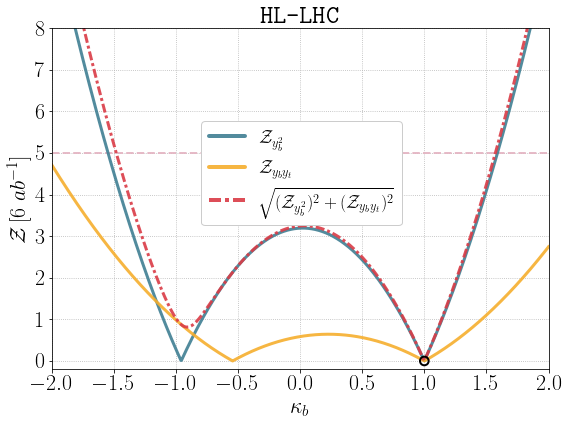

In [7]:
plt.figure(figsize=(8,6))
X = np.linspace(-2, 2, 1000)
Y1 = abs((sigmabbh1(X, 0) - sigmabbh1(1., 0.)))/np.sqrt(sigmabbh1(1., 0.))
Y2 = abs((sigmabbh2(X, 0) - sigmabbh2(1., 0.)))/np.sqrt(sigmabbh2(1., 0.))
YS = np.sqrt(Y1**2 + Y2**2)

plt.axhline(y=5, color='#E4B4C2', linewidth=2, alpha=0.9, linestyle='dashed')
plt.plot(X, Y1, color='#3f7f93', linewidth=3, alpha=0.9)
plt.plot(X, Y2, color='#F6AE2D', linewidth=3, alpha=0.9)
plt.plot(X, YS, color='#da3b46', linewidth=3, alpha=0.9, linestyle=(0, (3, 1, 1, 1)))
plt.scatter([1.], [0.], s=75, zorder=25, facecolors='none', edgecolors='black', linewidth=2)

labels = [r'$\mathcal{Z}_{y_b^2}$', r'$\mathcal{Z}_{y_by_t}$', r'$\sqrt{(\mathcal{Z}_{y_b^2})^2 + (\mathcal{Z}_{y_by_t})^2}$']
line0 = Line2D([0], [0], color='#3f7f93', linewidth=4, linestyle='-', solid_capstyle='round', markersize=10, alpha=0.9)
line1 = Line2D([0], [0], color='#F6AE2D', linewidth=4, linestyle='-', solid_capstyle='round', markersize=10, alpha=0.9)
line2 = Line2D([0], [0], color='#da3b46', linewidth=4, linestyle=(0, (3, 1, 1, 1)), solid_capstyle='round', markersize=10, alpha=0.9)
leg = plt.figlegend(handles=[line0, line1, line2], labels=labels, bbox_to_anchor=[0.53, 0.73],
                    loc='upper center', prop={'size': 18}, fancybox=True, framealpha=1, columnspacing=1,
                    ncol=1)

plt.xlim((-2,2))
plt.ylim((-0.2,8))
plt.xlabel(r'$\kappa_b$', fontsize=22)
plt.ylabel(r'$\mathcal{Z}\, [6\;ab^{-1}]$', fontsize=22)
plt.locator_params(axis='y', nbins=9)
plt.locator_params(axis='x', nbins=9)
plt.tick_params(axis="x", labelsize=22)
plt.tick_params(axis="y", labelsize=22)
plt.title('HL-LHC', fontsize=26)
plt.grid(linestyle=':')
plt.tight_layout()
plt.savefig('../plots/sig14.pdf', dpi=300)
plt.show()

In [8]:
chisq = lambda x: np.sqrt(abs((sigmabbh1(x, 0) - sigmabbh1(1., 0.)))**2/np.sqrt(sigmabbh1(1., 0.))**2 
                            + abs((sigmabbh2(x, 0) - sigmabbh2(1., 0.)))**2/np.sqrt(sigmabbh2(1., 0.))**2) - 1.

for i in [-1., -0.5, 0.5, 1.]:
    z = fsolve(chisq, i)
    print(z)

[-0.99319793]
[-0.81811192]
[0.83799531]
[1.13842002]


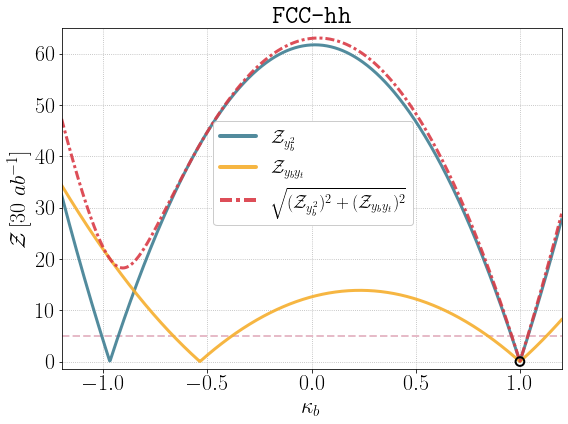

In [9]:
plt.figure(figsize=(8,6))
X = np.linspace(-1.2, 1.2, 1000)
Y1 = abs((sigmabbh100(X, 0) - sigmabbh100(1., 0.)))/np.sqrt(sigmabbh100(1., 0.))
Y2 = abs((sigmabbh200(X, 0) - sigmabbh200(1., 0.)))/np.sqrt(sigmabbh200(1., 0.))
YS = np.sqrt(Y1**2 + Y2**2)

plt.axhline(y=5, color='#E4B4C2', linewidth=2, alpha=0.9, linestyle='dashed')
plt.plot(X, Y1, color='#3f7f93', linewidth=3, alpha=0.9)
plt.plot(X, Y2, color='#F6AE2D', linewidth=3, alpha=0.9)
plt.plot(X, YS, color='#da3b46', linewidth=3, alpha=0.9, linestyle=(0, (3, 1, 1, 1)))
plt.scatter([1.], [0.], s=75, zorder=25, facecolors='none', edgecolors='black', linewidth=2)

labels = [r'$\mathcal{Z}_{y_b^2}$', r'$\mathcal{Z}_{y_by_t}$', r'$\sqrt{(\mathcal{Z}_{y_b^2})^2 + (\mathcal{Z}_{y_by_t})^2}$']
line0 = Line2D([0], [0], color='#3f7f93', linewidth=4, linestyle='-', solid_capstyle='round', markersize=10, alpha=0.9)
line1 = Line2D([0], [0], color='#F6AE2D', linewidth=4, linestyle='-', solid_capstyle='round', markersize=10, alpha=0.9)
line2 = Line2D([0], [0], color='#da3b46', linewidth=4, linestyle=(0, (3, 1, 1, 1)), solid_capstyle='round', markersize=10, alpha=0.9)
leg = plt.figlegend(handles=[line0, line1, line2], labels=labels, bbox_to_anchor=[0.55, 0.73],
                    loc='upper center', prop={'size': 18}, fancybox=True, framealpha=1, columnspacing=1,
                    ncol=1)

plt.xlim((-1.2,1.2))
plt.ylim((-1.5,65))
plt.xlabel(r'$\kappa_b$', fontsize=22)
plt.ylabel(r'$\mathcal{Z}\, [30\;ab^{-1}]$', fontsize=22)
# plt.locator_params(axis='y', nbins=9)
# plt.locator_params(axis='x', nbins=9)
plt.tick_params(axis="x", labelsize=22)
plt.tick_params(axis="y", labelsize=22)
plt.title('FCC-hh', fontsize=26)
plt.grid(linestyle=':')
plt.tight_layout()
plt.savefig('../plots/sig100.pdf', dpi=300)
plt.show()

In [10]:
chisq = lambda x: np.sqrt(abs((sigmabbh100(x, 0) - sigmabbh100(1., 0.)))**2/np.sqrt(sigmabbh100(1., 0.))**2 
                            + abs((sigmabbh200(x, 0) - sigmabbh200(1., 0.)))**2/np.sqrt(sigmabbh200(1., 0.))**2) - 1.

for i in [0.99, 1.01]:
    z = fsolve(chisq, i)
    print(z)

[0.99231368]
[1.00762548]


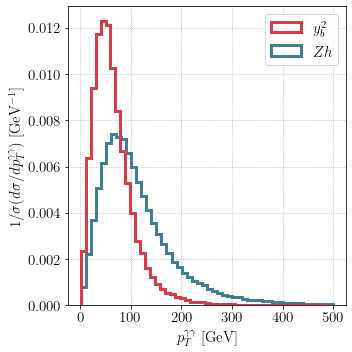

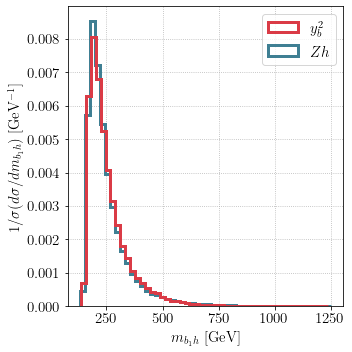

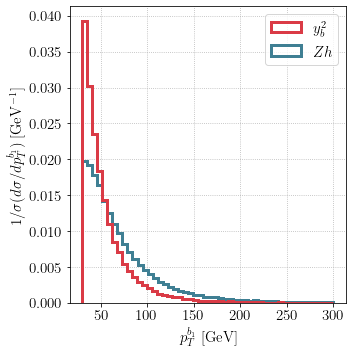

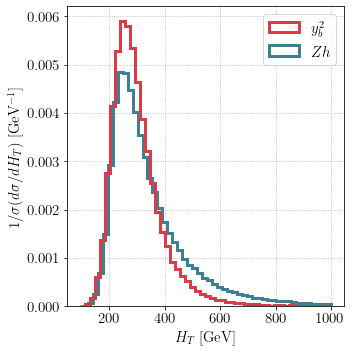

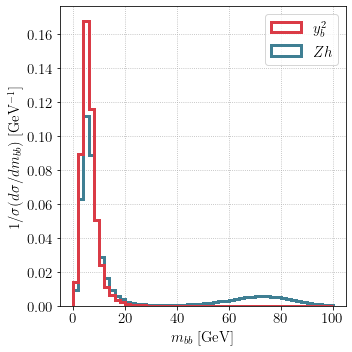

In [11]:
density=True

plt.figure(figsize=(5,5))
plt.hist(df_yb2[df_yb2.ptaa < 500].ptaa, bins=50, histtype='step', linewidth=3, label=r'$y_b^2$', weights=df_yb2[df_yb2.ptaa < 500]['weight'] * 6 * 1e6 * 1.5, density=density, color='#da3b46', zorder=100)
plt.hist(df_zh[df_zh.ptaa < 500].ptaa, bins=50, histtype='step', linewidth=3, label=r'$Zh$', weights=df_zh[df_zh.ptaa < 500]['weight'] * 6 * 1e6 * 1.3, density=density, color='#3f7f93')
plt.grid(linestyle=':')
plt.xlabel(r'$p_T^{\gamma\gamma} \;\rm [GeV]$', fontsize=15)
plt.ylabel(r'$1/\sigma (d\sigma/dp_T^{\gamma\gamma}) \;\rm [GeV^{-1}]$', fontsize=15)
plt.legend(fontsize=15)
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()
plt.savefig('../plots/ptaa-zh-yb2.pdf', dpi=300)

plt.figure(figsize=(5,5))
plt.hist(df_yb2[df_yb2.mb1h < 1250].mb1h, bins=50, histtype='step', linewidth=3, label=r'$y_b^2$', weights=df_yb2[df_yb2.mb1h < 1250]['weight'] * 6 * 1e6 * 1.5, density=density, color='#da3b46', zorder=100)
plt.hist(df_zh[df_zh.mb1h < 1250].mb1h, bins=50, histtype='step', linewidth=3, label=r'$Zh$', weights=df_zh[df_zh.mb1h < 1250]['weight'] * 6 * 1e6 * 1.3, density=density, color='#3f7f93')
plt.grid(linestyle=':')
plt.xlabel(r'$m_{b_1h} \;\rm [GeV]$', fontsize=15)
plt.ylabel(r'$1/\sigma (d\sigma/dm_{b_1h}) \;\rm [GeV^{-1}]$', fontsize=15)
plt.legend(fontsize=15)
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()
plt.savefig('../plots/mb1h-zh-yb2.pdf', dpi=300)

plt.figure(figsize=(5,5))
plt.hist(df_yb2[df_yb2.ptb1 < 300].ptb1, bins=50, histtype='step', linewidth=3, label=r'$y_b^2$', weights=df_yb2[df_yb2.ptb1 < 300]['weight'] * 6 * 1e6 * 1.5, density=density, color='#da3b46', zorder=100)
plt.hist(df_zh[df_zh.ptb1 < 300].ptb1, bins=50, histtype='step', linewidth=3, label=r'$Zh$', weights=df_zh[df_zh.ptb1 < 300]['weight'] * 6 * 1e6 * 1.3, density=density, color='#3f7f93')
plt.grid(linestyle=':')
plt.xlabel(r'$p_T^{b_1} \;\rm [GeV]$', fontsize=15)
plt.ylabel(r'$1/\sigma (d\sigma/dp_T^{b_1}) \;\rm [GeV^{-1}]$', fontsize=15)
plt.legend(fontsize=15)
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()
plt.savefig('../plots/ptb1-zh-yb2.pdf', dpi=300)

plt.figure(figsize=(5,5))
plt.hist(df_yb2[df_yb2.ht < 1000].ht, bins=50, histtype='step', linewidth=3, label=r'$y_b^2$', weights=df_yb2[df_yb2.ht < 1000]['weight'] * 6 * 1e6 * 1.5, density=density, color='#da3b46', zorder=100)
plt.hist(df_zh[df_zh.ht < 1000].ht, bins=50, histtype='step', linewidth=3, label=r'$Zh$', weights=df_zh[df_zh.ht < 1000]['weight'] * 6 * 1e6 * 1.3, density=density, color='#3f7f93')
plt.grid(linestyle=':')
plt.xlabel(r'$H_{T} \;\rm [GeV]$', fontsize=15)
plt.ylabel(r'$1/\sigma (d\sigma/dH_{T}) \;\rm [GeV^{-1}]$', fontsize=15)
plt.legend(fontsize=15)
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()
plt.savefig('../plots/ht-zh-yb2.pdf', dpi=300)

plt.figure(figsize=(5,5))
plt.hist(df_yb2[df_yb2.mbb < 100].mbb, bins=50, histtype='step', linewidth=3, label=r'$y_b^2$', weights=df_yb2[df_yb2.mbb < 100]['weight'] * 6 * 1e6 * 1.5, density=density, color='#da3b46', zorder=100)
plt.hist(df_zh[df_zh.mbb < 100].mbb, bins=50, histtype='step', linewidth=3, label=r'$Zh$', weights=df_zh[df_zh.mbb < 100]['weight'] * 6 * 1e6 * 1.3, density=density, color='#3f7f93')
plt.grid(linestyle=':')
plt.xlabel(r'$m_{bb} \;\rm [GeV]$', fontsize=15)
plt.ylabel(r'$1/\sigma (d\sigma/dm_{bb}) \;\rm [GeV^{-1}]$', fontsize=15)
plt.legend(fontsize=15)
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()
plt.savefig('../plots/mbb-zh-yb2.pdf', dpi=300)

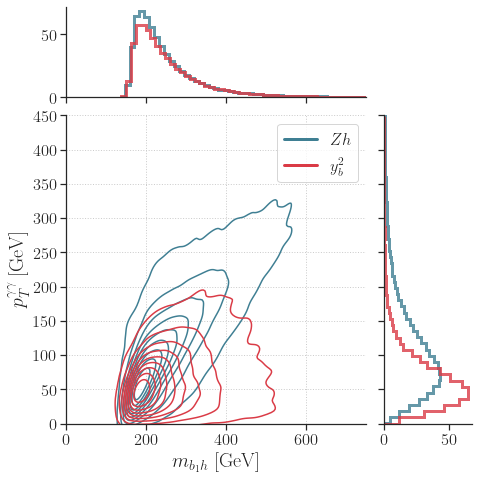

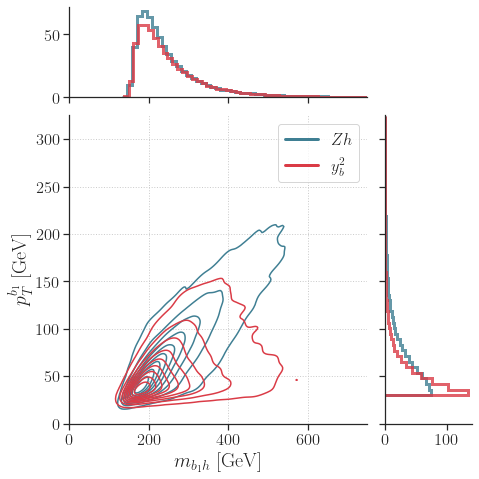

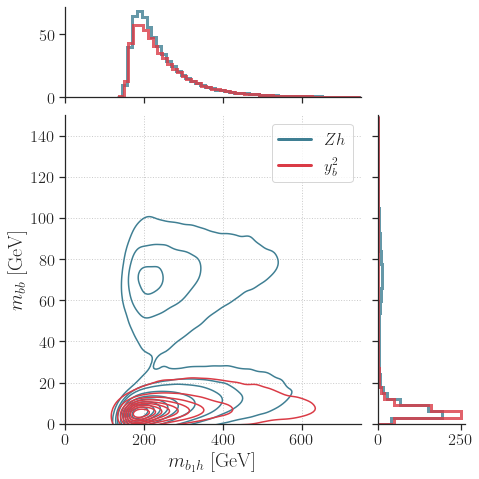

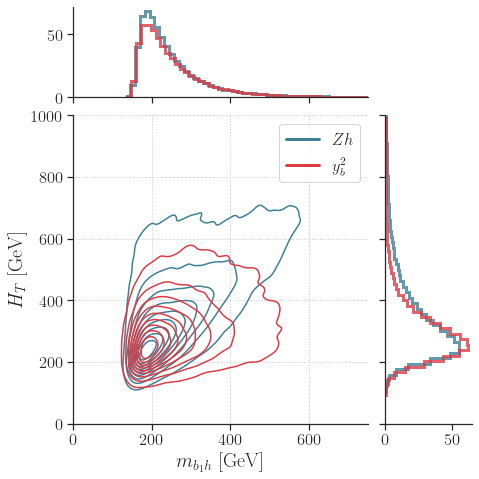

In [12]:
df_plot_yb2 = df_yb2
df_plot_zh = df_zh
df_plot = pd.concat([df_plot_yb2, df_plot_zh], axis=0)

sns.set(font_scale=1.5, style='ticks')

def makeJoint(var, lim, names):
    xlim = lim[0]
    ylim = lim[1]
    g = sns.JointGrid(marginal_ticks=True, height=7, ratio=3, xlim = (0,xlim), ylim = (0,ylim))
    g.ax_joint.grid(linestyle=':')

    x, y = df_plot[(df_plot['class']==1) & (df_plot[var[0]] < xlim)][var[0]], df_plot[(df_plot['class']==1) & (df_plot[var[1]] < ylim)][var[1]]
    weightx, weighty = df_plot[(df_plot['class']==1) & (df_plot[var[0]] < xlim)]['weight'], df_plot[(df_plot['class']==1) & (df_plot[var[1]] < ylim)]['weight']
    sns.kdeplot(x=x, y=y, color='#3f7f93', ax=g.ax_joint)
    sns.distplot(x=x, kde=False, bins=50, hist_kws={'alpha': 0.8, 'histtype': 'step', 'linewidth': 3, 'weights': weightx * 6 * 1e6 * 1.3},
                 color='#3f7f93', ax=g.ax_marg_x)
    sns.distplot(x=y, kde=False,  bins=50, vertical=True, hist_kws={'alpha': 0.8, 'histtype': 'step', 'linewidth': 3, 'weights': weighty * 6 * 1e6 * 1.3},
                 color='#3f7f93', ax=g.ax_marg_y)

    x, y = df_plot[(df_plot['class']==4) & (df_plot[var[0]] < xlim)][var[0]], df_plot[(df_plot['class']==4) & (df_plot[var[1]] < ylim)][var[1]]
    weightx, weighty = df_plot[(df_plot['class']==4) & (df_plot[var[0]] < xlim)]['weight'], df_plot[(df_plot['class']==4) & (df_plot[var[1]] < ylim)]['weight']
    sns.kdeplot(x=x, y=y, color='#da3b46', ax=g.ax_joint)
    sns.distplot(x=x, kde=False, bins=50, hist_kws={'alpha': 0.8, 'histtype': 'step', 'linewidth': 3, 'weights': weightx * 6 * 1e6 * 1.5},
                 color='#da3b46', ax=g.ax_marg_x)
    sns.distplot(x=y, kde=False, bins=50, vertical=True, hist_kws={'alpha': 0.8, 'histtype': 'step', 'linewidth': 3, 'weights': weighty * 6 * 1e6 * 1.5},
                 color='#da3b46', ax=g.ax_marg_y)

    g.set_axis_labels(names[0], names[1], fontsize=20)
    phantom1, = g.ax_joint.plot([], [], linestyle="-", alpha=1, color='#3f7f93', linewidth=3)
    phantom2, = g.ax_joint.plot([], [], linestyle="-", alpha=1, color='#da3b46', linewidth=3)
    g.ax_joint.legend([phantom1, phantom2],[r'$Zh$', r'$y_b^2$'])
    return plt
    
var=["mb1h", "ptaa"]
lim=[750, 450]
names=[r'$m_{b_1h} \;\rm [GeV]$', r'$p_{T}^{\gamma\gamma} \;\rm [GeV]$']
plt = makeJoint(var, lim, names)
plt.tight_layout()
plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.savefig('../plots/shape-mb1h-ptaa.pdf', dpi=300)
plt.show()

var=["mb1h", "ptb1"]
lim=[750, 325]
names=[r'$m_{b_1h} \;\rm [GeV]$', r'$p_{T}^{b_1} \;\rm [GeV]$']
plt = makeJoint(var, lim, names)
plt.tight_layout()
plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.savefig('../plots/shape-mb1h-ptb1.pdf', dpi=300)
plt.show()

var=["mb1h", "mbb"]
lim=[750, 150]
names=[r'$m_{b_1h} \;\rm [GeV]$', r'$m_{bb} \;\rm [GeV]$']
makeJoint(var, lim, names)
plt.tight_layout()
plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.savefig('../plots/shape-mb1h-mbb.pdf', dpi=300)
plt.show()

var=["mb1h", "ht"]
lim=[750, 1000]
names=[r'$m_{b_1h} \;\rm [GeV]$', r'$H_T \;\rm [GeV]$']
makeJoint(var, lim, names)
plt.tight_layout()
plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.savefig('../plots/shape-mb1h-ht.pdf', dpi=300)
plt.show()


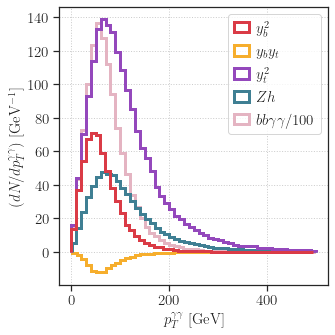

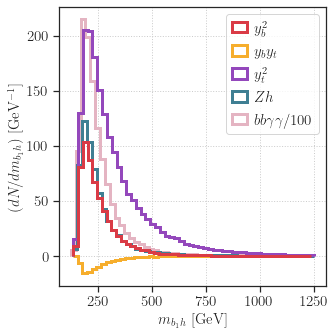

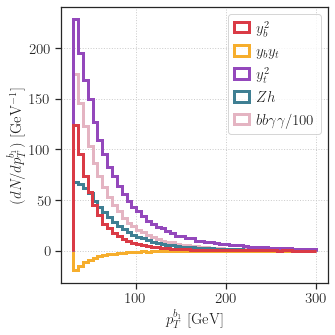

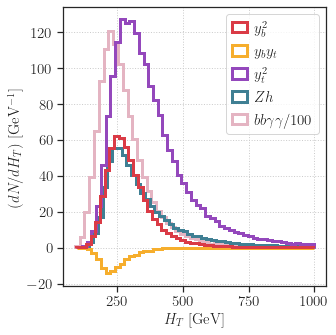

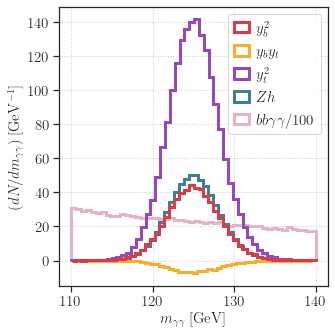

In [13]:
density = False
fact = 100
plt.figure(figsize=(5,5))
plt.hist(df_yb2[df_yb2.ptaa < 500].ptaa, bins=50, histtype='step', linewidth=3, label=r'$y_b^2$', weights=df_yb2[df_yb2.ptaa < 500]['weight'] * 6 * 1e6 * 1.5, density=density, color='#da3b46', zorder=100)
plt.hist(df_ybyt[df_ybyt.ptaa < 500].ptaa, bins=50, histtype='step', linewidth=3, label=r'$y_by_t$', weights=df_ybyt[df_ybyt.ptaa < 500]['weight'] * 6 * 1e6 * 1.9, density=density, color='#F6AE2D')
plt.hist(df_yt2[df_yt2.ptaa < 500].ptaa, bins=50, histtype='step', linewidth=3, label=r'$y_t^2$', weights=df_yt2[df_yt2.ptaa < 500]['weight'] * 6 * 1e6 * 2.5, density=density, color='#9448BC', zorder=50)
plt.hist(df_zh[df_zh.ptaa < 500].ptaa, bins=50, histtype='step', linewidth=3, label=r'$Zh$', weights=df_zh[df_zh.ptaa < 500]['weight'] * 6 * 1e6 * 1.3, density=density, color='#3f7f93', zorder=20)
plt.hist(df_bbxaa[df_bbxaa.ptaa < 500].ptaa, bins=50, histtype='step', linewidth=3, label=r'$bb\gamma\gamma/100$', weights=df_bbxaa[df_bbxaa.ptaa < 500]['weight'] * 6 * 1e6 * 1.5/fact, density=density, color='#E4B4C2')
plt.grid(linestyle=':')
plt.xlabel(r'$p_T^{\gamma\gamma} \;\rm [GeV]$', fontsize=15)
plt.ylabel(r'$(dN/dp_T^{\gamma\gamma}) \;\rm [GeV^{-1}]$', fontsize=15)
plt.legend(fontsize=15, ncol=1, columnspacing=0.5, handlelength=1, handletextpad=0.5, loc='upper right')
# plt.ylim((-15, 165))
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()
plt.savefig('../plots/ptaa-5-channel.pdf', dpi=300)
plt.show()

plt.figure(figsize=(5,5))
plt.hist(df_yb2[df_yb2.mb1h < 1250].mb1h, bins=50, histtype='step', linewidth=3, label=r'$y_b^2$', weights=df_yb2[df_yb2.mb1h < 1250]['weight'] * 6 * 1e6 * 1.5, density=density, color='#da3b46', zorder=100)
plt.hist(df_ybyt[df_ybyt.mb1h < 1250].mb1h, bins=50, histtype='step', linewidth=3, label=r'$y_by_t$', weights=df_ybyt[df_ybyt.mb1h < 1250]['weight'] * 6 * 1e6 * 1.9, density=density, color='#F6AE2D')
plt.hist(df_yt2[df_yt2.mb1h < 1250].mb1h, bins=50, histtype='step', linewidth=3, label=r'$y_t^2$', weights=df_yt2[df_yt2.mb1h < 1250]['weight'] * 6 * 1e6 * 2.5, density=density, color='#9448BC', zorder=50)
plt.hist(df_zh[df_zh.mb1h < 1250].mb1h, bins=50, histtype='step', linewidth=3, label=r'$Zh$', weights=df_zh[df_zh.mb1h < 1250]['weight'] * 6 * 1e6 * 1.3, density=density, color='#3f7f93', zorder=20)
plt.hist(df_bbxaa[df_bbxaa.mb1h < 1250].mb1h, bins=50, histtype='step', linewidth=3, label=r'$bb\gamma\gamma/100$', weights=df_bbxaa[df_bbxaa.mb1h < 1250]['weight'] * 6 * 1e6 * 1.5/fact, density=density, color='#E4B4C2')
plt.grid(linestyle=':')
plt.xlabel(r'$m_{b_1h} \;\rm [GeV]$', fontsize=15)
plt.ylabel(r'$(dN/dm_{b_1h}) \;\rm [GeV^{-1}]$', fontsize=15)
plt.legend(fontsize=15, ncol=1, columnspacing=0.5, handlelength=1, handletextpad=0.5, loc='upper right')
# plt.ylim((-20, 260))
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()
plt.savefig('../plots/mb1h-5-channel.pdf', dpi=300)
plt.show()

plt.figure(figsize=(5,5))
plt.hist(df_yb2[df_yb2.ptb1 < 300].ptb1, bins=50, histtype='step', linewidth=3, label=r'$y_b^2$', weights=df_yb2[df_yb2.ptb1 < 300]['weight'] * 6 * 1e6 * 1.5, density=density, color='#da3b46', zorder=100)
plt.hist(df_ybyt[df_ybyt.ptb1 < 300].ptb1, bins=50, histtype='step', linewidth=3, label=r'$y_by_t$', weights=df_ybyt[df_ybyt.ptb1 < 300]['weight'] * 6 * 1e6 * 1.9, density=density, color='#F6AE2D')
plt.hist(df_yt2[df_yt2.ptb1 < 300].ptb1, bins=50, histtype='step', linewidth=3, label=r'$y_t^2$', weights=df_yt2[df_yt2.ptb1 < 300]['weight'] * 6 * 1e6 * 2.5, density=density, color='#9448BC', zorder=50)
plt.hist(df_zh[df_zh.ptb1 < 300].ptb1, bins=50, histtype='step', linewidth=3, label=r'$Zh$', weights=df_zh[df_zh.ptb1 < 300]['weight'] * 6 * 1e6 * 1.3, density=density, color='#3f7f93', zorder=20)
plt.hist(df_bbxaa[df_bbxaa.ptb1 < 300].ptb1, bins=50, histtype='step', linewidth=3, label=r'$bb\gamma\gamma/100$', weights=df_bbxaa[df_bbxaa.ptb1 < 300]['weight'] * 6 * 1e6 * 1.5/fact, density=density, color='#E4B4C2')
plt.grid(linestyle=':')
plt.xlabel(r'$p_T^{b_1} \;\rm [GeV]$', fontsize=15)
plt.ylabel(r'$(dN/dp_T^{b_1}) \;\rm [GeV^{-1}]$', fontsize=15)
plt.legend(fontsize=15, ncol=1, columnspacing=0.5, handlelength=1, handletextpad=0.5, loc='upper right')
# plt.ylim((-25, 215))
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()
plt.savefig('../plots/ptb1-5-channel.pdf', dpi=300)
plt.show()

plt.figure(figsize=(5,5))
plt.hist(df_yb2[df_yb2.ht < 1000].ht, bins=50, histtype='step', linewidth=3, label=r'$y_b^2$', weights=df_yb2[df_yb2.ht < 1000]['weight'] * 6 * 1e6 * 1.5, density=density, color='#da3b46', zorder=100)
plt.hist(df_ybyt[df_ybyt.ht < 1000].ht, bins=50, histtype='step', linewidth=3, label=r'$y_by_t$', weights=df_ybyt[df_ybyt.ht < 1000]['weight'] * 6 * 1e6 * 1.9, density=density, color='#F6AE2D')
plt.hist(df_yt2[df_yt2.ht < 1000].ht, bins=50, histtype='step', linewidth=3, label=r'$y_t^2$', weights=df_yt2[df_yt2.ht < 1000]['weight'] * 6 * 1e6 * 2.5, density=density, color='#9448BC', zorder=50)
plt.hist(df_zh[df_zh.ht < 1000].ht, bins=50, histtype='step', linewidth=3, label=r'$Zh$', weights=df_zh[df_zh.ht < 1000]['weight'] * 6 * 1e6 * 1.3, density=density, color='#3f7f93', zorder=20)
plt.hist(df_bbxaa[df_bbxaa.ht < 1000].ht, bins=50, histtype='step', linewidth=3, label=r'$bb\gamma\gamma/100$', weights=df_bbxaa[df_bbxaa.ht < 1000]['weight'] * 6 * 1e6 * 1.5/fact, density=density, color='#E4B4C2')
plt.grid(linestyle=':')
plt.xlabel(r'$H_{T} \;\rm [GeV]$', fontsize=15)
plt.ylabel(r'$(dN/dH_{T}) \;\rm [GeV^{-1}]$', fontsize=15)
plt.legend(fontsize=15, ncol=1, columnspacing=0.5, handlelength=1, handletextpad=0.5, loc='upper right')
# plt.ylim((-18, 145))
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()
plt.savefig('../plots/ht-5-channel.pdf', dpi=300)
plt.show()

plt.figure(figsize=(5,5))
plt.hist(df_yb2.maa, bins=50, histtype='step', linewidth=3, label=r'$y_b^2$', weights=df_yb2['weight'] * 6 * 1e6 * 1.5, density=density, color='#da3b46', zorder=100)
plt.hist(df_ybyt.maa, bins=50, histtype='step', linewidth=3, label=r'$y_by_t$', weights=df_ybyt['weight'] * 6 * 1e6 * 1.9, density=density, color='#F6AE2D')
plt.hist(df_yt2.maa, bins=50, histtype='step', linewidth=3, label=r'$y_t^2$', weights=df_yt2['weight'] * 6 * 1e6 * 2.5, density=density, color='#9448BC', zorder=50)
plt.hist(df_zh.maa, bins=50, histtype='step', linewidth=3, label=r'$Zh$', weights=df_zh['weight'] * 6 * 1e6 * 1.3, density=density, color='#3f7f93', zorder=20)
plt.hist(df_bbxaa.maa, bins=50, histtype='step', linewidth=3, label=r'$bb\gamma\gamma/100$', weights=df_bbxaa['weight'] * 6 * 1e6 * 1.5/fact, density=density, color='#E4B4C2')
plt.grid(linestyle=':')
plt.xlabel(r'$m_{\gamma\gamma} \;\rm [GeV]$', fontsize=15)
plt.ylabel(r'$(dN/dm_{\gamma\gamma}) \;\rm [GeV^{-1}]$', fontsize=15)
plt.legend(fontsize=15, ncol=1, columnspacing=0.5, handlelength=1, handletextpad=0.5, loc='upper right')
# plt.ylim((-10, 100))
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()
plt.savefig('../plots/maa-5-channel.pdf', dpi=300)
plt.show()

In [14]:
np.savetxt("../simulations/Correlations/yb2.txt", df_yb2.iloc[:,:-2].corr().values, fmt="%s")

In [15]:
np.savetxt("../simulations/Correlations/zh.txt", df_zh.iloc[:,:-2].corr().values, fmt="%s")

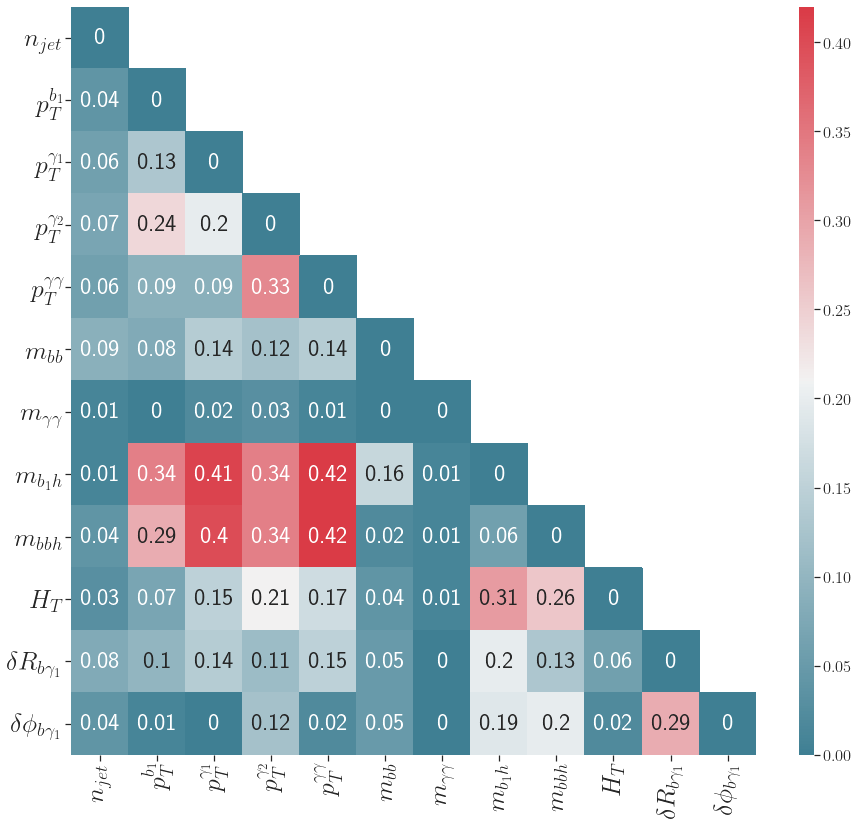

In [16]:
df_corr = df_yb2.iloc[:,:-2].corr() - df_zh.iloc[:,:-2].corr()

var = [r'$n_{jet}$', r'$p_T^{b_1}$', r'$p_T^{\gamma_1}$', r'$p_T^{\gamma_2}$', r'$p_T^{\gamma\gamma}$', r'$m_{bb}$', r'$m_{\gamma\gamma}$', r'$m_{b_1h}$', r'$m_{bbh}$',
       r'$H_T$', r'$\delta R_{b\gamma_1}$', r'$\delta\phi_{b\gamma_1}$']
    
fig, ax = plt.subplots(figsize=(13.5, 12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.zeros((df_corr.shape[1],df_corr.shape[1]))
mask[np.triu_indices_from(mask)] = True
np.fill_diagonal(mask,0)
heat = sns.heatmap(round(np.abs(df_corr), 2)+0., mask=mask, annot=True, cmap=cmap, cbar_kws={"aspect": 50}, xticklabels=var, yticklabels=var,
                   annot_kws={"fontsize": 24})
ax = plt.gca()
sns.set(font_scale=2., style='ticks')
heat.set_xticklabels(heat.get_xmajorticklabels(), fontsize = 26, rotation=90)
heat.set_yticklabels(heat.get_ymajorticklabels(), fontsize = 26, rotation=0)
plt.tight_layout()
plt.savefig('../plots/corr-diff-yb2-zh.png', dpi=300)